# Python notebook to reproduce _Supplementary Figure 9_

In [1]:
import os
import json
import matplotlib.pyplot as plt

import plot_settings
import plot_utils

In [2]:
fig_dir = 'supplementary/figure_9/'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

# Code to reproduce Supplementary Figure 9

Supplementary Fig. 9

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


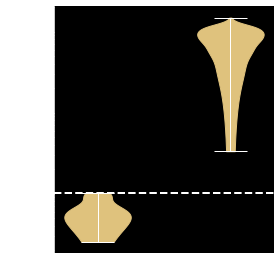

In [3]:
%matplotlib inline

ct_OI = 'THCA'

with open('results/TCGA/{}_obs_absolute_error.txt'.format(ct_OI), 'r') as f:
    obs_ae = json.load(f)
with open('results/TCGA/{}_cens_absolute_error.txt'.format(ct_OI), 'r') as f:
    cens_ae = json.load(f)

color = plot_settings.get_base_color()

ax = plot_settings.get_square_axis()
plot_utils.violin_plot(ax, [obs_ae, cens_ae], xlabel='', ylabel='Loss for individual patient',
                       xticks=['Uncensored', 'Censored'], yscale='log', violin_color=color,
                       violin_line_color='white')
plot_utils.horizontal_line(ax, max(obs_ae), linestyle='--', linewidth=2, color='white')
plot_utils.format_ax(ax)

plt.tight_layout()
plt.savefig(fig_dir + 'figure_7.pdf')